# Predicting Students Maths Performance

### Phase 2: Statistical Modelling

### Group Number: 49

#### Group member names and student ID's:

    Ibrahim Al-Ashhab    s3953973
    Abhijeet Kumar       s3905291
    Philip Goutama       s3948643
    Rashik Raj           s3931830
    Kawish Raj           s3931853

## Table Of Contents
- [Introduction](#Introduction)
    - [Phase 1 Summary](#Phase1Summary)
    - [Report Overview](#ReportOverview)
    - [Overview of Methodology](#OverviewofMethodology)
    
- [Statistical Modelling](#StatisticalModelling)
    - [Full Model Overview](#FullModelOverview)
    - [Model Fitting](#ModelFitting)
    - [Neural Network Model Fitting & Tuning](#NNMFT)

- [Critique & Limitations](#Critique&Limitations)
    
- [Summary & Conclusions](#Summary&Conclusions)
    - [Project Summary](#ProjectSummary)
    - [Summary of Findings](#SummaryofFindings)
    - [Conclusions](#Conclusions)
    
- [References](#References)

## Introduction <a id="Introduction"></a>

### Phase 1 Summary <a id="Phase1Summary"></a>

In phase 1 of our project we performed some data cleaning and preprocessing. This was minimal though as our dataset was mostly ready to work with. We also used libraries like seaborn and matplotlib to plot graphs and extract useful information about our dataset. This helped us establish some associations between various attributes and our target variable. We concluded that we need to dig deeper and analyze our dataset more to establish some causations and make informed predictions. 

### Report Overview <a id="ReportOverview"></a>

In this report, we explore our data by fitting it into a multiple linear regression model to explore the effects of multiple variables on our target feature which is G3, the final maths scores of school students. We also assess the strenghts and limitations of our approach. We finally summarize our whole project and present our findings and conclude.

### Overview of Methodology <a id="OverviewofMethodology"></a>

In the following 'Statistical Modelling' section of our report you will find that we first constructed a regression formula and added all the independent features to it. We had previously label encoded our categorical variables so we did not need to do that again and went straight to fitting an OLS (ordinary least squares) model to our encoded data. We then defined a new dataframe that included the actual maths scores of students, the predicted scores, and the residuals for the full model to use it for plotting the predicted scores and the regression residuals.After plotting the predicted scores and the regression residuals, we performed backwards feature selection to get a reduced model. Using the reduced model we defined a new dataframe that included the actual maths scores of students, the predicted scores, and the residuals just like we did for the full model. Using this new dataframe, we plotted graphs for the predicted scores and the regression residuals. We then examined the graphs and drew our conclusions from there.


## Statistical Modelling <a id="StatisticalModelling"></a>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

### Full Model Overview <a id="FullModelOverview"></a>

In [117]:
data = pd.read_csv('Maths_scores.csv')

In [118]:
data.head()

,school,sex,age,study_time,medu,fedu,failures,school_sup,fam_sup,absences,fam_rel,p_status,g1,g2,g3
0,0,0,18,2,4,4,0,1,0,6,4,0,5,6,6
1,0,0,17,2,1,1,0,0,1,4,5,1,5,5,6
2,0,0,15,2,1,1,3,1,0,10,4,1,7,8,10
3,0,0,15,3,4,2,0,0,1,2,3,1,15,14,15
4,0,0,16,2,3,3,0,0,1,4,4,1,6,10,10


In [119]:
formula = 'g3 ~ ' + ' + '.join(data.drop(columns='g3').columns)
print('formula: ', formula)

formula:  g3 ~ school + sex + age + study_time + medu + fedu + failures + school_sup + fam_sup + absences + fam_rel + p_status + g1 + g2


In [120]:
model_full = sm.formula.ols(formula=formula, data=data)
model_full_fitted = model_full.fit()

print(model_full_fitted.summary())
print(f"Regression number of terms: {len(model_full_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_full_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_full_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_full_fitted.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:                     g3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          1.21e-140
Time:                        19:18:19   Log-Likelihood:                -801.38
No. Observations:                 395   AIC:                             1633.
Df Residuals:                     380   BIC:                             1692.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1891      1.613      0.117      0.9

In [121]:
residuals_full = pd.DataFrame({'actual': data['g3'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)


,actual,predicted,residual
0,6,4.833148,1.166852
1,6,4.147911,1.852089
2,10,7.246146,2.753854
3,15,14.101210,0.898790
4,10,8.804197,1.195803
5,15,16.114520,-1.114520
6,11,11.675173,-0.675173
7,6,4.459877,1.540123
8,19,18.866054,0.133946
9,15,15.435392,-0.435392


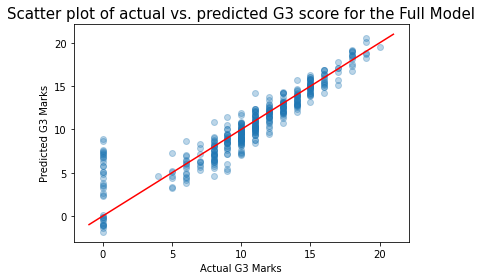

In [122]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual G3 Marks');
plt.ylabel('Predicted G3 Marks');
plt.title('Scatter plot of actual vs. predicted G3 score for the Full Model', fontsize=15);
plt.show();

### Model Fitting <a id="ModelFitting"></a>

### Neural Network Model Fitting & Tuning <a id="NNMFT"></a>

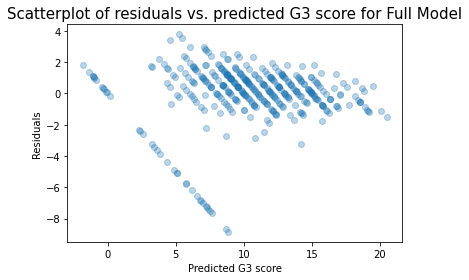

In [123]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted G3 score');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted G3 score for Full Model', fontsize=15)
plt.show();

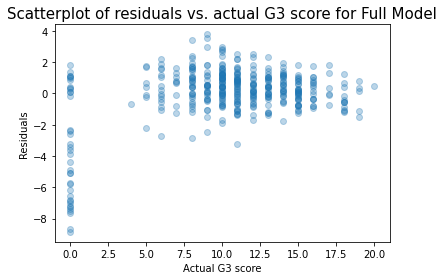

In [124]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual G3 score');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual G3 score for Full Model', fontsize=15)
plt.show();

model overestimates students with 0 marks and underestimates students with marks in range 5-15

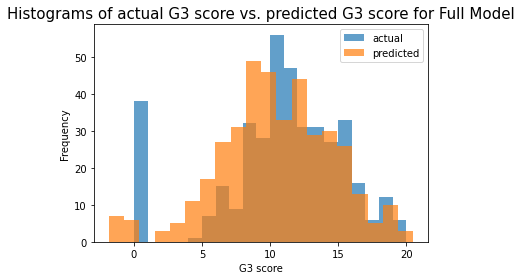

In [125]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('G3 score');
plt.ylabel('Frequency');
plt.title('Histograms of actual G3 score vs. predicted G3 score for Full Model', fontsize=15);
plt.legend()
plt.show();

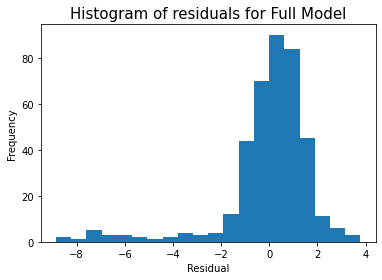

In [126]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Full Model', fontsize=15);
plt.show();

### Backwards Feature Selection<a href="#Backwards-Feature-Selection" class="anchor-link"></a>

We now perform backwards feature selection using p-values.

In [167]:
patsy_description = patsy.ModelDesc.from_formula(formula)

linreg_fit = model_full_fitted

p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values and adj_square:')

checked_terms = []
removed_terms = []

while True:
    prev_adj_square = linreg_fit.rsquared_adj
    pval_series = linreg_fit.pvalues.drop(labels='Intercept').sort_values(ascending=False)
    terms = pval_series.index
    term = terms[0]

    # for check_term in terms:
    #     if check_term not in checked_terms:
    #         term = check_term
    #         break
    # else:
    #     break
    
    pval = pval_series[term]
    if (pval < p_val_cutoff):
        break
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term)]))

    linreg_fit = smf.ols(formula=patsy_description, data=data).fit()
    checked_terms.append(term)
    # filter the 
    # if prev_adj_square > linreg_fit.rsquared_adj:
    #     print(f'\tPrevious adj_square {prev_adj_square:.4} > current adj_square {linreg_fit.rsquared_adj:.4}')
    #     print(f'\tAdding term "{term}" with p-value {pval:.4}')
    #     patsy_description.rhs_termlist.insert(0, patsy.Term([patsy.EvalFactor(term)]))
    # else:
    #     removed_terms.append(term)
    removed_terms.append(term)

model_reduced_fitted = smf.ols(formula = patsy_description, data = data).fit()

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print("model_full_fitted data")
print(f"Regression number of terms: {len(model_full_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_full_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_full_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_full_fitted.rsquared_adj:.4f}")
print("***")
print(f"Terms removed: {removed_terms}")
print(f"Updated formulae: {patsy_description.describe()}")
print("***")
print("model_reduced_fitted data")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values and adj_square:

Removing term "p_status" with p-value 0.4892

Removing term "sex" with p-value 0.4082

Removing term "fam_sup" with p-value 0.369

Removing term "medu" with p-value 0.3224

Removing term "fedu" with p-value 0.3331

Removing term "school_sup" with p-value 0.2314

Removing term "failures" with p-value 0.1949

Removing term "study_time" with p-value 0.2261

Removing term "school" with p-value 0.1174

***
                            OLS Regression Results                            
Dep. Variable:                     g3   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     389.8
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          5.12e-149
Time:                        21:04:34   Log-Likelihood:                -806.98
No. Observations:                 395   AIC:     

This model returns an Adjusted R-squared of 0.8336, meaning the reduced model still explains about 80% of the variance, but with 9 less variables. Looking at the p-values, they are all significant at the 5% level, as expected. we still have the same issues with our model. That is, the model overestimates students with 0 marks and underestimates students with marks in range 5-15. We will now perform the diagnostic checks on this reduced model.

### Reduced Model Diagnostic Checks<a href="#Reduced-Model-Diagnostic-Checks" class="anchor-link"></a>

Let's first get a scatter plot of residuals (as a function of predicted
age).

In [168]:
residuals_reduced = pd.DataFrame({'actual': data['g3'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,6,4.641163,1.358837
1,6,4.134732,1.865268
2,10,7.692765,2.307235
3,15,14.118109,0.881891
4,10,9.027317,0.972683
5,15,15.958202,-0.958202
6,11,11.756458,-0.756458
7,6,4.022736,1.977264
8,19,18.458168,0.541832
9,15,15.565396,-0.565396


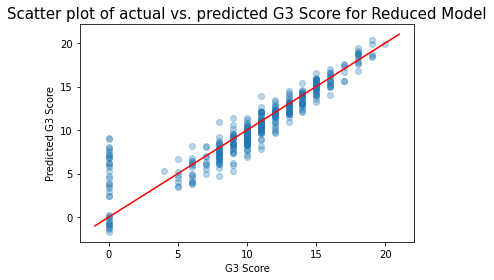

In [169]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('G3 Score');
plt.ylabel('Predicted G3 Score');
plt.title('Scatter plot of actual vs. predicted G3 Score for Reduced Model', fontsize=15);
plt.show(); 

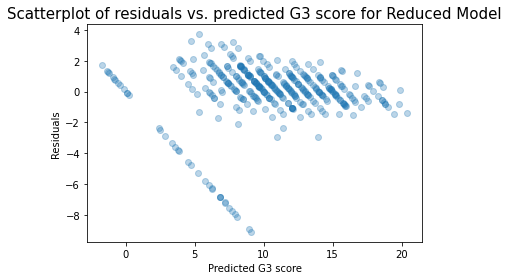

In [170]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted G3 score');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted G3 score for Reduced Model', fontsize=15)
plt.show();

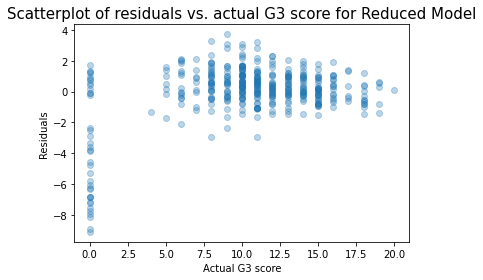

In [171]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Actual G3 score');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual G3 score for Reduced Model', fontsize=15)
plt.show();

model overestimates students with 0 marks and underestimates students with marks in range 5-15

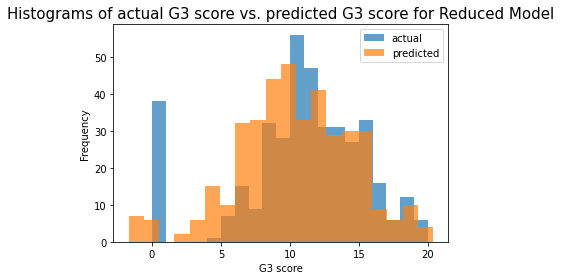

In [172]:
plt.hist(residuals_reduced['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_reduced['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('G3 score');
plt.ylabel('Frequency');
plt.title('Histograms of actual G3 score vs. predicted G3 score for Reduced Model', fontsize=15);
plt.legend()
plt.show();

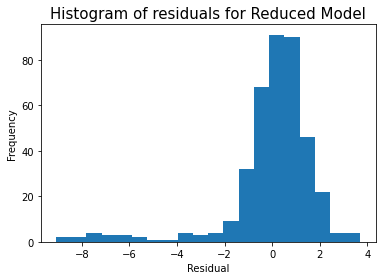

In [173]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Reduced Model', fontsize=15);
plt.show();

## Critique & Limitations <a id="Critique&Limitations"></a>

## Summary & Conclusions <a id="Summary&Conclusions"></a>

### Statistical Modelling 

For our project we were supposed to come up with a linear model to predict G3 for a student depending on various descriptive factors.First  we used Ordinary Least Squares regression to predict the coefficient for the linera model with all the variables the formula for which is  "g3 ~ school + sex + age + study_time + medu + fedu + failures + school_sup + fam_sup + absences + fam_rel + p_status + g1 + g2". Then we did model selection using backward elimination based on p-value and removed 9 variables from the formulae which fixes overfitting. Finally, we are left with 6 variables and the final formula was: "g3 ~ age + absences + fam_rel + g1 + g2". Finally we checked the model condiiton using graphs and all the variables were linearly related to the outcome and the variability of the variables are nealry constant.

### Project Summary <a id="ProjectSummary"></a>

#### Phase 1

This report is based on the dataset regarding the Final Maths scores of secondary school students in two Portuguese schools. The aim of the report is to find what factors of a student's day to day life affect their grades and we also derive a multiple regression model from this dataset which aims to predict a students grade based on these factors.

#### Data Cleaning and Processing

The initial dataset has 33 features, we narrowed down the features to: Name, school, sex, age, studytime, Medu, Fedu, failures , G1, G2 and G3. These features should be adequate  to predict G3 for our report using Multiple Linear Regression. There are no outliers in the dataset nor are there any missing values in any row. Then we label encoded all the categorical variables.

#### Data Exploration and Visualisation

After cleaning and processing the data we visualised various graphs such as one, two and three variable visualizations, to assure that the features that we selected had relationship with our target variable i.e. G3 and to check if there were any outliers.

#### Findings and Conclusion

The objective of the report was to find g3 based on various factors of a students life. The final model predicts g3 based on age, study_time, failures, school_sup, absences, fam_rel, G1 and G2. Based on the coefficient of the model we determine that G3 is least affected by absences, age, study_time and failures which had coefficients 0.0418, 0.1516, 0.1886 and 0.1944 respectively. G3 is most influence by G2 and school_sup which has the highest coefficients in the model 0.9684 and 0.3511 respectively. From this model we conclude that grades of a student is mostly influenced by recent exam performance and school support rather than the tradional belived factors such as age, absences and failures.

### Summary of Findings <a id="SummaryofFindings"></a>

### Conclusions <a id="Conclusions"></a>

## References <a id="References"></a>